# BlocksCutter

In [1]:
import os

os.environ["USE_PYGEOS"] = os.environ.get("USE_PYGEOS", "0")
import geopandas as gpd
import pandas as pd

# path to data
example_data_path = "./data"
# TODO: upload example data somewhere and download it in script

# load data required for blocks cutter
city_geometry = gpd.read_parquet(os.path.join(example_data_path, "city_geometry.parquet"))
water_geometry = gpd.read_parquet(os.path.join(example_data_path, "water_geometry.parquet"))
roads_geometry = gpd.read_parquet(os.path.join(example_data_path, "roads_geometry.parquet"))
railways_geometry = gpd.read_parquet(os.path.join(example_data_path, "railways_geometry.parquet"))
nature_geometry_boundaries = gpd.read_parquet(os.path.join(example_data_path, "nature_geometry_boundaries.parquet"))

/home/vasilstar/masterplanning/.venv/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/home/vasilstar/masterplanning/.venv/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


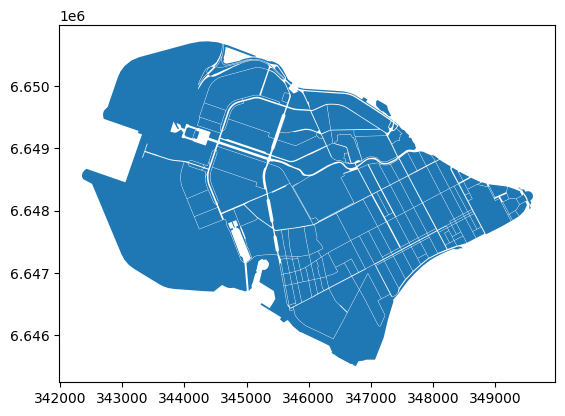

In [2]:
from masterplan_tools.method.blocks import BlocksCutter, BlocksCutterParameters, BlocksCutterGeometries, BlocksCutterFeature
from masterplan_tools.models.geojson import GeoJSON

# for example, we can change some of cutter's parameters like buffers
params = BlocksCutterParameters(roads_buffer=10, block_cutoff_ratio=0.05)
geoms = BlocksCutterGeometries(
    city=GeoJSON[BlocksCutterFeature].from_gdf(city_geometry),
    water=GeoJSON[BlocksCutterFeature].from_gdf(water_geometry),
    roads=GeoJSON[BlocksCutterFeature].from_gdf(roads_geometry),
    railways=GeoJSON[BlocksCutterFeature].from_gdf(railways_geometry),
    nature=GeoJSON[BlocksCutterFeature].from_gdf(nature_geometry_boundaries),
)
cutter = BlocksCutter(geometries=geoms)
blocks = cutter.cut_blocks().to_gdf().plot()

# DataGetter

In [3]:
buildings = gpd.read_parquet(os.path.join(example_data_path, "buildings.parquet"))
greenings = gpd.read_parquet(os.path.join(example_data_path, "greenings.parquet"))
parkings = gpd.read_parquet(os.path.join(example_data_path, "parkings.parquet"))
buildings

,population_balanced,building_area,living_area,storeys_count,is_living,geometry,living_area_pyatno,total_area
0,0,439.9230,0.0,2.0,False,POINT (346419.440 6645746.556),0.0,879.846
1,0,90.8479,0.0,0.0,False,POINT (346404.511 6645778.545),0.0,0.000
2,0,54.8750,0.0,0.0,False,POINT (346393.945 6645794.323),0.0,0.000
3,0,158.6920,0.0,0.0,False,POINT (346419.604 6645798.198),0.0,0.000
4,0,205.0480,0.0,0.0,False,POINT (346393.335 6645817.967),0.0,0.000
...,...,...,...,...,...,...,...,...
3743,0,18.8506,0.0,0.0,False,POINT (345029.285 6650377.778),0.0,0.000
3744,0,15.4680,0.0,0.0,False,POINT (345038.615 6650380.285),0.0,0.000
3745,0,17.5489,0.0,0.0,False,POINT (345050.448 6650383.702),0.0,0.000
3746,0,16.1324,0.0,0.0,False,POINT (345058.378 6650385.834),0.0,0.000


In [5]:
from masterplan_tools.preprocessing import DataGetter, DataGetterGeometries
from masterplan_tools.preprocessing.data_getter_geometries import DataGetterGeometries, DataGetterBuildingsFeature, DataGetterGreeningsFeature, DataGetterParkingsFeature
geoms = DataGetterGeometries(
  buildings=GeoJSON[DataGetterBuildingsFeature].from_gdf(buildings), 
  greenings=GeoJSON[DataGetterGreeningsFeature].from_gdf(greenings),
  parkings=GeoJSON[DataGetterParkingsFeature].from_gdf(parkings),
)

ValidationError: 1 validation error for Geometry
type
  Input should be 'Polygon' or 'MultiPolygon' [type=literal_error, input_value='Point', input_type=str]
    For further information visit https://errors.pydantic.dev/2.0.1/v/literal_error

In [ ]:
schools = gpd.read_parquet(os.path.join(example_data_path, "schools.parquet"))
kindergartens = gpd.read_parquet(os.path.join(example_data_path, "kindergartens.parquet"))
recreational_areas = gpd.read_parquet(os.path.join(example_data_path, "recreational_areas.parquet"))

In [ ]:
from masterplan_tools.models import ServiceType
from masterplan_tools.models import Block

school : ServiceType = ServiceType(name='school', demand=123, accessibility=123)
kindergarten : ServiceType = ServiceType(name='kindergarten', demand=123, accessibility=123)
recreational_area = ServiceType(name='recreational_area', demand=123, accessibility=123)
service_types : list[ServiceType] = [school, kindergarten, recreational_area]
